In [1]:
import sys
import os, os.path

sys.path.append(os.path.join(os.getcwd() ,'/modules'))
root_path = "C:/git/Springboard-Public/Capstone Project 2/"
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    root_path = "/content/drive/My Drive/Capstone Project 2/"

print('Current Working Dir: ', os.getcwd())
print('Root Path: ', root_path)

# We need to set the working directory since we are using relative paths from various locations
if os.getcwd() != root_path:
  os.chdir(root_path)

Current Working Dir:  C:\git\Springboard-Public\Capstone Project 2\notebooks
Root Path:  C:/git/Springboard-Public/Capstone Project 2/


In [2]:
from modules.lib.StandardTraining import *
from modules.models.ResNet import ResNet_GrayScale_12_Out

from torchsummary import summary

# os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

%matplotlib inline

In [3]:
force_cpu = True
device = torch.device('cuda' if ~force_cpu and torch.cuda.is_available() else 'cpu')
# Assume that we are on a CUDA machine, then this should print a CUDA device:
print(f'Working on device={device}')

Working on device=cuda


In [4]:
net = ResNet_GrayScale_12_Out(layers=34, drop_out_precent=.2) #18, 34, 50, 101, 152

net = nn.DataParallel(net)
net.to(device)


summary(net, (1, 320, 320))   

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 160, 160]           3,136
       BatchNorm2d-2         [-1, 64, 160, 160]             128
              ReLU-3         [-1, 64, 160, 160]               0
         MaxPool2d-4           [-1, 64, 80, 80]               0
            Conv2d-5           [-1, 64, 80, 80]          36,864
       BatchNorm2d-6           [-1, 64, 80, 80]             128
              ReLU-7           [-1, 64, 80, 80]               0
            Conv2d-8           [-1, 64, 80, 80]          36,864
       BatchNorm2d-9           [-1, 64, 80, 80]             128
             ReLU-10           [-1, 64, 80, 80]               0
       BasicBlock-11           [-1, 64, 80, 80]               0
           Conv2d-12           [-1, 64, 80, 80]          36,864
      BatchNorm2d-13           [-1, 64, 80, 80]             128
             ReLU-14           [-1, 64,

          ResNet-125                 [-1, 1000]               0
          Linear-126                   [-1, 12]          12,012
ResNet_GrayScale_12_Out-127                   [-1, 12]               0
Total params: 21,803,412
Trainable params: 21,803,412
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.39
Forward/backward pass size (MB): 196.50
Params size (MB): 83.17
Estimated Total Size (MB): 280.07
----------------------------------------------------------------


In [5]:
standardTraining = StandardTraining(number_images=0, 
                                     batch_size=32, 
                                     learning_rate=1e-4, 
                                     num_epochs=20,
                                     device=device, 
                                     net=net,
                                     use_positivity_weights=True,
                                     observation_min_count = 150)

Total Oversampled Rows Added to Train: 75,073

Number of Training Images: 180,481
Number of Validation Images: 26,340

Positive Weights used in BCEWithLogitsLoss:


Enlarged_Cardiomediastinum     5.459130
Cardiomegaly                   3.685627
Lung_Opacity                   1.059627
Lung_Lesion                    5.819353
Edema                          2.601696
Consolidation                  4.973621
Pneumonia                      8.365906
Atelectasis                    3.161041
Pneumothorax                   5.489554
Pleural_Effusion               1.518960
Pleural_Other                 10.607242
Fracture                       6.153996
dtype: float64

In [6]:
standardTraining.train()

▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [1/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 4056.2372         
Time of Completion: 2020-07-25 21:18:19.248418          
Training Time: 0:36:16.261026          
Validation Time: 0:02:46.090908

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,38518,0.776546,0.519622,0.622620,0.878161,0.735069
4,Edema,50110,0.769048,0.531274,0.628421,0.839801,0.689520
5,Consolidation,30213,0.718631,0.416002,0.526958,0.847917,0.676990
7,Atelectasis,43374,0.640891,0.406606,0.497548,0.758733,0.597027
9,Pleural_Effusion,71649,0.743527,0.652775,0.695202,0.822332,0.761708



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,3034,0.446935,0.401897,0.423221,0.802987,0.387721
4,Edema,6212,0.758854,0.418093,0.539143,0.782365,0.492539
5,Consolidation,1585,0.095899,0.106219,0.100796,0.632010,0.090669
7,Atelectasis,4159,0.095937,0.230104,0.135415,0.602233,0.203092
9,Pleural_Effusion,8911,0.674896,0.621795,0.647258,0.810671,0.679761


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [2/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 3039.3230         
Time of Completion: 2020-07-25 21:54:19.501642          
Training Time: 0:33:25.996812          
Validation Time: 0:02:32.506093

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,38518,0.834623,0.644623,0.727421,0.934340,0.854905
4,Edema,50110,0.814728,0.601187,0.691855,0.896092,0.801547
5,Consolidation,30213,0.785854,0.561832,0.655223,0.917251,0.816629
7,Atelectasis,43374,0.700166,0.524689,0.599858,0.850018,0.741095
9,Pleural_Effusion,71649,0.810186,0.744103,0.775740,0.898832,0.867291



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,3034,0.675016,0.307461,0.422486,0.815847,0.415685
4,Edema,6212,0.672086,0.458590,0.545182,0.793667,0.512492
5,Consolidation,1585,0.338170,0.109814,0.165790,0.657958,0.105176
7,Atelectasis,4159,0.272181,0.224871,0.246274,0.613796,0.207234
9,Pleural_Effusion,8911,0.551229,0.697331,0.615732,0.819302,0.695238


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [3/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 2697.7033         
Time of Completion: 2020-07-25 22:30:22.121386          
Training Time: 0:33:27.978378          
Validation Time: 0:02:32.966868

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,38518,0.857106,0.672863,0.753891,0.948119,0.881570
4,Edema,50110,0.830273,0.622419,0.711476,0.910354,0.827088
5,Consolidation,30213,0.814120,0.614357,0.700270,0.936072,0.854178
7,Atelectasis,43374,0.724950,0.560180,0.632002,0.873451,0.777235
9,Pleural_Effusion,71649,0.827367,0.765377,0.795166,0.915771,0.890040



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,3034,0.474621,0.424779,0.448319,0.817593,0.422018
4,Edema,6212,0.818577,0.394829,0.532712,0.789062,0.507465
5,Consolidation,1585,0.196215,0.125201,0.152863,0.666063,0.102738
7,Atelectasis,4159,0.290695,0.225266,0.253832,0.615596,0.213809
9,Pleural_Effusion,8911,0.574907,0.697291,0.630213,0.823294,0.701399


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [4/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 2477.9191         
Time of Completion: 2020-07-25 23:06:19.067371          
Training Time: 0:33:22.959838          
Validation Time: 0:02:32.277739

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,38518,0.867776,0.695355,0.772056,0.955224,0.897126
4,Edema,50110,0.842866,0.637005,0.725617,0.919274,0.842367
5,Consolidation,30213,0.829676,0.648447,0.727951,0.947660,0.875273
7,Atelectasis,43374,0.738945,0.578527,0.648970,0.885859,0.795241
9,Pleural_Effusion,71649,0.836857,0.777661,0.806174,0.924608,0.901422



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,3034,0.572512,0.372108,0.451052,0.811201,0.406347
4,Edema,6212,0.501610,0.504779,0.503189,0.784529,0.510506
5,Consolidation,1585,0.390536,0.101061,0.160571,0.642982,0.096503
7,Atelectasis,4159,0.330849,0.225168,0.267965,0.614688,0.210962
9,Pleural_Effusion,8911,0.711256,0.625605,0.665686,0.823765,0.696703


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [5/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 2291.5860         
Time of Completion: 2020-07-25 23:42:19.662636          
Training Time: 0:33:24.715220          
Validation Time: 0:02:34.218518

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,38518,0.878914,0.712101,0.786763,0.961577,0.909519
4,Edema,50110,0.849312,0.649547,0.736117,0.926386,0.855890
5,Consolidation,30213,0.846589,0.671198,0.748760,0.955439,0.891025
7,Atelectasis,43374,0.753170,0.600957,0.668508,0.897171,0.813518
9,Pleural_Effusion,71649,0.847004,0.786723,0.815751,0.931264,0.910052



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,3034,0.512525,0.419364,0.461287,0.822795,0.441313
4,Edema,6212,0.730683,0.437368,0.547197,0.793092,0.516116
5,Consolidation,1585,0.251735,0.109046,0.152174,0.646388,0.098654
7,Atelectasis,4159,0.529454,0.213538,0.304333,0.624745,0.215167
9,Pleural_Effusion,8911,0.772416,0.607663,0.680206,0.832426,0.707439


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [6/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 2118.2540         
Time of Completion: 2020-07-26 00:18:42.085684          
Training Time: 0:33:46.637743          
Validation Time: 0:02:34.131750

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,38518,0.888234,0.726668,0.799369,0.966294,0.919109
4,Edema,50110,0.856057,0.659507,0.745037,0.932036,0.865642
5,Consolidation,30213,0.860524,0.692956,0.767702,0.963050,0.905927
7,Atelectasis,43374,0.768502,0.616046,0.683880,0.907668,0.828907
9,Pleural_Effusion,71649,0.853117,0.796023,0.823582,0.936948,0.917418



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,3034,0.602175,0.353659,0.445610,0.815061,0.427950
4,Edema,6212,0.608983,0.483760,0.539196,0.790972,0.515205
5,Consolidation,1585,0.391798,0.102917,0.163014,0.645931,0.096760
7,Atelectasis,4159,0.132484,0.233871,0.169148,0.613317,0.211916
9,Pleural_Effusion,8911,0.794748,0.597688,0.682274,0.833583,0.712998


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [7/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 1975.1222         
Time of Completion: 2020-07-26 00:54:44.125034          
Training Time: 0:33:27.060868          
Validation Time: 0:02:33.286036

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,38518,0.893634,0.736262,0.807351,0.970193,0.926620
4,Edema,50110,0.862024,0.669280,0.753522,0.936894,0.873863
5,Consolidation,30213,0.873995,0.712002,0.784725,0.968913,0.918294
7,Atelectasis,43374,0.782865,0.629281,0.697721,0.916223,0.841955
9,Pleural_Effusion,71649,0.857863,0.801484,0.828716,0.941548,0.923005



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,3034,0.513514,0.410108,0.456022,0.815773,0.427403
4,Edema,6212,0.713458,0.436178,0.541379,0.783921,0.505559
5,Consolidation,1585,0.295899,0.106277,0.156385,0.632604,0.095133
7,Atelectasis,4159,0.604713,0.203249,0.304240,0.612660,0.207426
9,Pleural_Effusion,8911,0.857031,0.548359,0.668798,0.831744,0.705195


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [8/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 1850.5560         
Time of Completion: 2020-07-26 01:30:47.987510          
Training Time: 0:33:28.139976          
Validation Time: 0:02:34.063958

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,38518,0.900800,0.743964,0.814904,0.972825,0.931756
4,Edema,50110,0.869008,0.680428,0.763242,0.941508,0.882342
5,Consolidation,30213,0.888326,0.731886,0.802554,0.974083,0.929199
7,Atelectasis,43374,0.796445,0.642877,0.711469,0.923563,0.852932
9,Pleural_Effusion,71649,0.865525,0.808506,0.836044,0.944602,0.926824



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,3034,0.692156,0.311711,0.429843,0.816205,0.426977
4,Edema,6212,0.734385,0.424886,0.538321,0.780151,0.489745
5,Consolidation,1585,0.222713,0.118975,0.155097,0.650402,0.102622
7,Atelectasis,4159,0.522241,0.204520,0.293931,0.601736,0.206534
9,Pleural_Effusion,8911,0.775783,0.596051,0.674143,0.825127,0.696175


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [9/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 1731.8236         
Time of Completion: 2020-07-26 02:06:59.082583          
Training Time: 0:33:35.204066          
Validation Time: 0:02:34.202548

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,38518,0.908562,0.756556,0.825621,0.976520,0.939025
4,Edema,50110,0.873259,0.689314,0.770459,0.944967,0.888120
5,Consolidation,30213,0.899315,0.744635,0.814698,0.978104,0.937961
7,Atelectasis,43374,0.807235,0.655392,0.723432,0.930299,0.863627
9,Pleural_Effusion,71649,0.869084,0.813825,0.840547,0.948337,0.931722



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,3034,0.637113,0.309528,0.416640,0.803741,0.392407
4,Edema,6212,0.600612,0.484545,0.536371,0.788963,0.507302
5,Consolidation,1585,0.152681,0.121669,0.135422,0.651061,0.097920
7,Atelectasis,4159,0.353691,0.218476,0.270107,0.608590,0.209964
9,Pleural_Effusion,8911,0.711144,0.642893,0.675298,0.834596,0.709626


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [10/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 1624.5377         
Time of Completion: 2020-07-26 02:43:07.147763          
Training Time: 0:33:32.515251          
Validation Time: 0:02:33.921307

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,38518,0.916533,0.767957,0.835693,0.979236,0.945002
4,Edema,50110,0.882419,0.697951,0.779419,0.949550,0.895825
5,Consolidation,30213,0.910469,0.762227,0.829779,0.982106,0.947433
7,Atelectasis,43374,0.820445,0.667930,0.736374,0.937356,0.874559
9,Pleural_Effusion,71649,0.874569,0.819111,0.845932,0.951664,0.935979



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,3034,0.696770,0.297286,0.416757,0.811174,0.408414
4,Edema,6212,0.774791,0.415702,0.541091,0.790653,0.512123
5,Consolidation,1585,0.046057,0.159737,0.071499,0.623655,0.097556
7,Atelectasis,4159,0.264727,0.233362,0.248057,0.614658,0.213791
9,Pleural_Effusion,8911,0.642464,0.666861,0.654435,0.828305,0.708620


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [11/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 1524.2232         
Time of Completion: 2020-07-26 03:19:13.412736          
Training Time: 0:33:31.104009          
Validation Time: 0:02:33.504407

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,38518,0.925126,0.781687,0.847379,0.982101,0.951687
4,Edema,50110,0.885731,0.708591,0.787320,0.953164,0.903207
5,Consolidation,30213,0.918413,0.776689,0.841626,0.985126,0.954643
7,Atelectasis,43374,0.836423,0.685104,0.753239,0.944782,0.887336
9,Pleural_Effusion,71649,0.878435,0.822452,0.849523,0.953691,0.938317



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,3034,0.426170,0.431000,0.428571,0.798195,0.402117
4,Edema,6212,0.691726,0.445793,0.542174,0.788199,0.504713
5,Consolidation,1585,0.182334,0.116345,0.142050,0.643068,0.097025
7,Atelectasis,4159,0.409714,0.211730,0.279184,0.608616,0.210753
9,Pleural_Effusion,8911,0.748289,0.615356,0.675343,0.829167,0.701125


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [12/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 1441.5721         
Time of Completion: 2020-07-26 03:55:19.444377          
Training Time: 0:33:30.348048          
Validation Time: 0:02:34.056944

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,38518,0.931383,0.794556,0.857546,0.984456,0.957058
4,Edema,50110,0.891898,0.719949,0.796752,0.957307,0.910404
5,Consolidation,30213,0.929037,0.798095,0.858602,0.987651,0.961946
7,Atelectasis,43374,0.848227,0.696377,0.764838,0.950646,0.897058
9,Pleural_Effusion,71649,0.880124,0.828864,0.853725,0.956833,0.942339



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,3034,0.657877,0.314281,0.425360,0.806414,0.405300
4,Edema,6212,0.909369,0.339381,0.494291,0.772312,0.467762
5,Consolidation,1585,0.509779,0.085124,0.145888,0.612046,0.089944
7,Atelectasis,4159,0.221928,0.226614,0.224247,0.600101,0.206838
9,Pleural_Effusion,8911,0.567950,0.692245,0.623967,0.818207,0.704535


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [13/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 1357.4788         
Time of Completion: 2020-07-26 04:31:28.320389          
Training Time: 0:33:33.343031          
Validation Time: 0:02:33.905357

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,38518,0.936082,0.805631,0.865971,0.986446,0.962121
4,Edema,50110,0.899960,0.731773,0.807199,0.961261,0.917418
5,Consolidation,30213,0.934234,0.809626,0.867478,0.989290,0.965717
7,Atelectasis,43374,0.863005,0.712366,0.780484,0.957266,0.908259
9,Pleural_Effusion,71649,0.885916,0.833585,0.858954,0.959298,0.945353



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,3034,0.636783,0.320239,0.426161,0.805504,0.398972
4,Edema,6212,0.509337,0.511726,0.510528,0.784774,0.500396
5,Consolidation,1585,0.151420,0.133111,0.141677,0.651560,0.104270
7,Atelectasis,4159,0.474152,0.206125,0.287338,0.606702,0.208316
9,Pleural_Effusion,8911,0.730446,0.635645,0.679756,0.833970,0.707358


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [14/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 1284.9388         
Time of Completion: 2020-07-26 05:07:36.941083          
Training Time: 0:33:33.004912          
Validation Time: 0:02:33.993122

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,38518,0.942442,0.815881,0.874607,0.988077,0.966041
4,Edema,50110,0.906386,0.743562,0.816940,0.964737,0.924101
5,Consolidation,30213,0.940092,0.824758,0.878656,0.990812,0.970344
7,Atelectasis,43374,0.875455,0.731539,0.797053,0.963330,0.920025
9,Pleural_Effusion,71649,0.891303,0.839437,0.864593,0.962292,0.949186



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,3034,0.491760,0.385231,0.432025,0.800354,0.395579
4,Edema,6212,0.711043,0.412418,0.522042,0.768086,0.477478
5,Consolidation,1585,0.177287,0.118018,0.141704,0.627405,0.095402
7,Atelectasis,4159,0.300313,0.205394,0.243945,0.585633,0.197562
9,Pleural_Effusion,8911,0.634384,0.660166,0.647018,0.820093,0.696459


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [15/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 1219.4479         
Time of Completion: 2020-07-26 05:43:45.826070          
Training Time: 0:33:33.356971          
Validation Time: 0:02:33.876434

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,38518,0.946233,0.827720,0.883018,0.989577,0.969940
4,Edema,50110,0.911295,0.756695,0.826830,0.968631,0.931852
5,Consolidation,30213,0.942872,0.834662,0.885473,0.992083,0.974000
7,Atelectasis,43374,0.884032,0.746355,0.809381,0.968323,0.929124
9,Pleural_Effusion,71649,0.896956,0.844283,0.869823,0.964971,0.952567



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,3034,0.578444,0.341639,0.429568,0.801236,0.400488
4,Edema,6212,0.694140,0.433019,0.533333,0.777781,0.486190
5,Consolidation,1585,0.368454,0.109322,0.168616,0.641716,0.099457
7,Atelectasis,4159,0.324838,0.213428,0.257603,0.591474,0.201545
9,Pleural_Effusion,8911,0.780159,0.579189,0.664818,0.820008,0.689192


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [16/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 1163.5198         
Time of Completion: 2020-07-26 06:19:55.089046          
Training Time: 0:33:33.689081          
Validation Time: 0:02:33.956221

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,38518,0.948206,0.835786,0.888454,0.990641,0.973220
4,Edema,50110,0.913670,0.769065,0.835154,0.971652,0.938012
5,Consolidation,30213,0.946480,0.840688,0.890453,0.992939,0.976186
7,Atelectasis,43374,0.894568,0.764522,0.824448,0.972854,0.938377
9,Pleural_Effusion,71649,0.901213,0.850872,0.875319,0.967531,0.955680



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,3034,0.477587,0.399614,0.435135,0.798413,0.394141
4,Edema,6212,0.558596,0.469046,0.509919,0.775935,0.482808
5,Consolidation,1585,0.340063,0.100560,0.155220,0.633301,0.094575
7,Atelectasis,4159,0.371484,0.210806,0.268976,0.601817,0.207003
9,Pleural_Effusion,8911,0.689260,0.633915,0.660430,0.820101,0.693722


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [17/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 1109.4645         
Time of Completion: 2020-07-26 06:56:04.269267          
Training Time: 0:33:33.494602          
Validation Time: 0:02:34.078916

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,38518,0.951581,0.846353,0.895888,0.991721,0.976092
4,Edema,50110,0.922071,0.781678,0.846090,0.975213,0.945259
5,Consolidation,30213,0.950352,0.849246,0.896959,0.993752,0.978675
7,Atelectasis,43374,0.899525,0.772288,0.831065,0.975561,0.943765
9,Pleural_Effusion,71649,0.906419,0.856713,0.880865,0.970351,0.959289



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,3034,0.575808,0.359096,0.442334,0.811364,0.415598
4,Edema,6212,0.885866,0.334366,0.485487,0.749676,0.445310
5,Consolidation,1585,0.092744,0.140000,0.111575,0.605204,0.094856
7,Atelectasis,4159,0.261361,0.230199,0.244792,0.596472,0.206270
9,Pleural_Effusion,8911,0.624846,0.664043,0.643848,0.819803,0.698694


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [18/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 1055.2838         
Time of Completion: 2020-07-26 07:32:15.077088          
Training Time: 0:33:35.229983          
Validation Time: 0:02:33.946226

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,38518,0.954177,0.854482,0.901582,0.992601,0.978320
4,Edema,50110,0.925065,0.795084,0.855164,0.978024,0.951263
5,Consolidation,30213,0.953033,0.859138,0.903653,0.994384,0.980902
7,Atelectasis,43374,0.908678,0.784916,0.842275,0.978550,0.949861
9,Pleural_Effusion,71649,0.911443,0.863810,0.886987,0.972922,0.962631



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,3034,0.661173,0.305095,0.417525,0.805747,0.403588
4,Edema,6212,0.798938,0.384282,0.518952,0.768014,0.466837
5,Consolidation,1585,0.060568,0.136752,0.083953,0.614184,0.091330
7,Atelectasis,4159,0.138014,0.242501,0.175912,0.594533,0.208417
9,Pleural_Effusion,8911,0.803838,0.556306,0.657548,0.810533,0.670817


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [19/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 1004.9557         
Time of Completion: 2020-07-26 08:08:35.477959          
Training Time: 0:33:44.219601          
Validation Time: 0:02:34.560604

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,38518,0.958227,0.859488,0.906176,0.993466,0.980182
4,Edema,50110,0.928956,0.803709,0.861806,0.980044,0.955367
5,Consolidation,30213,0.953861,0.864268,0.906857,0.995041,0.982509
7,Atelectasis,43374,0.912989,0.796220,0.850616,0.980674,0.954588
9,Pleural_Effusion,71649,0.915142,0.869823,0.891907,0.975205,0.965712



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,3034,0.638761,0.312429,0.419617,0.800617,0.387498
4,Edema,6212,0.453316,0.494556,0.473039,0.767643,0.476737
5,Consolidation,1585,0.371609,0.104045,0.162572,0.636008,0.098163
7,Atelectasis,4159,0.256792,0.228010,0.241547,0.600378,0.208904
9,Pleural_Effusion,8911,0.680619,0.625064,0.651660,0.814949,0.687592


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [20/20]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 965.6614         
Time of Completion: 2020-07-26 08:45:05.776719          
Training Time: 0:33:51.646106          
Validation Time: 0:02:37.017027

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,38518,0.958773,0.867757,0.910997,0.993921,0.981899
4,Edema,50110,0.933007,0.818004,0.871729,0.982821,0.961737
5,Consolidation,30213,0.956376,0.866573,0.909263,0.995138,0.982869
7,Atelectasis,43374,0.916840,0.810827,0.860581,0.983404,0.960552
9,Pleural_Effusion,71649,0.920446,0.878430,0.898947,0.977825,0.969241



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,3034,0.546473,0.334005,0.414604,0.783529,0.375178
4,Edema,6212,0.599163,0.449626,0.513734,0.765468,0.464156
5,Consolidation,1585,0.063091,0.134409,0.085874,0.611905,0.092581
7,Atelectasis,4159,0.536667,0.195122,0.286191,0.588858,0.202122
9,Pleural_Effusion,8911,0.790596,0.564006,0.658350,0.809592,0.671444



TRAINING

▔▔▔▔▔


,Score for all Targets
Accuracy Score,0.639486
Hamming Loss,0.049550
Combined Recall,0.787502
Combined Precision,0.740321
Combined F1,0.748530


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
0,Enlarged_Cardiomediastinum,27942,0.957448,0.870809,0.912076,0.995667,0.983857
1,Cardiomegaly,38518,0.958773,0.867757,0.910997,0.993921,0.981899
2,Lung_Opacity,87628,0.849078,0.838079,0.843543,0.936109,0.937235
3,Lung_Lesion,26466,0.965238,0.882022,0.921756,0.996979,0.987608
4,Edema,50110,0.933007,0.818004,0.871729,0.982821,0.961737
5,Consolidation,30213,0.956376,0.866573,0.909263,0.995138,0.982869
6,Pneumonia,19270,0.971303,0.873891,0.920026,0.997928,0.988624
7,Atelectasis,43374,0.916840,0.810827,0.860581,0.983404,0.960552
8,Pneumothorax,27811,0.958829,0.834408,0.892302,0.994916,0.979608
9,Pleural_Effusion,71649,0.920446,0.878430,0.898947,0.977825,0.969241


***** ROC *****


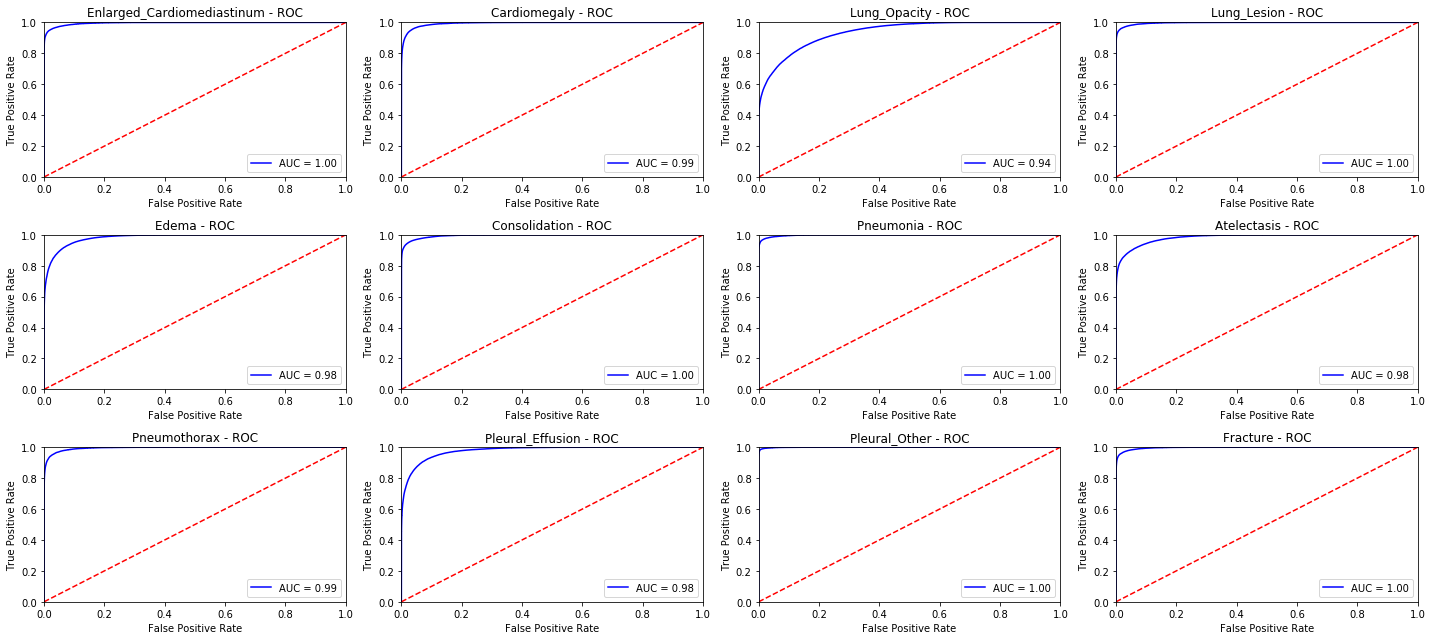

***** Precision / Recall *****


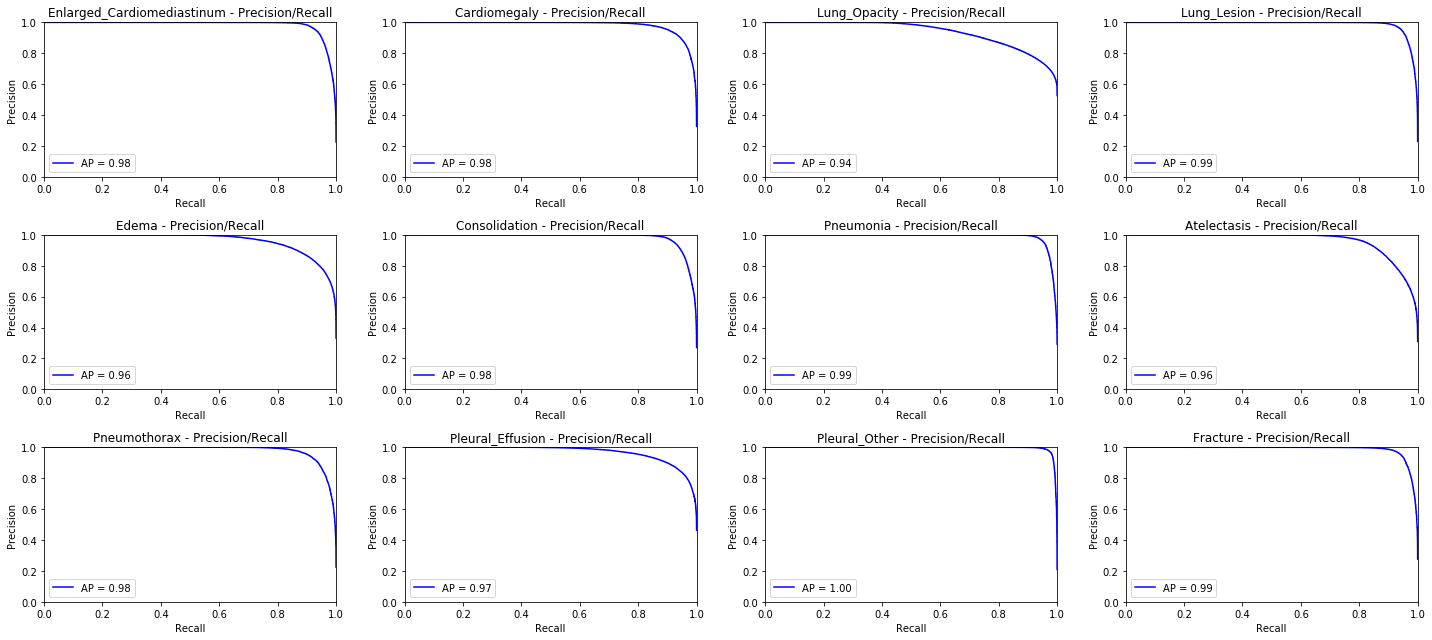


VALIDATION

▔▔▔▔▔▔▔


,Score for all Targets
Accuracy Score,0.069096
Hamming Loss,0.198861
Combined Recall,0.512483
Combined Precision,0.337914
Combined F1,0.380826


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
0,Enlarged_Cardiomediastinum,1366,0.216691,0.096042,0.133094,0.607802,0.082388
1,Cardiomegaly,3034,0.546473,0.334005,0.414604,0.783529,0.375178
2,Lung_Opacity,11980,0.905175,0.507607,0.650451,0.645594,0.561941
3,Lung_Lesion,1104,0.209239,0.095101,0.130767,0.664009,0.078674
4,Edema,6212,0.599163,0.449626,0.513734,0.765468,0.464156
5,Consolidation,1585,0.063091,0.134409,0.085874,0.611905,0.092581
6,Pneumonia,686,0.269679,0.043305,0.074627,0.616284,0.042086
7,Atelectasis,4159,0.536667,0.195122,0.286191,0.588858,0.202122
8,Pneumothorax,2075,0.367711,0.258469,0.303561,0.749999,0.235012
9,Pleural_Effusion,8911,0.790596,0.564006,0.658350,0.809592,0.671444


***** ROC *****


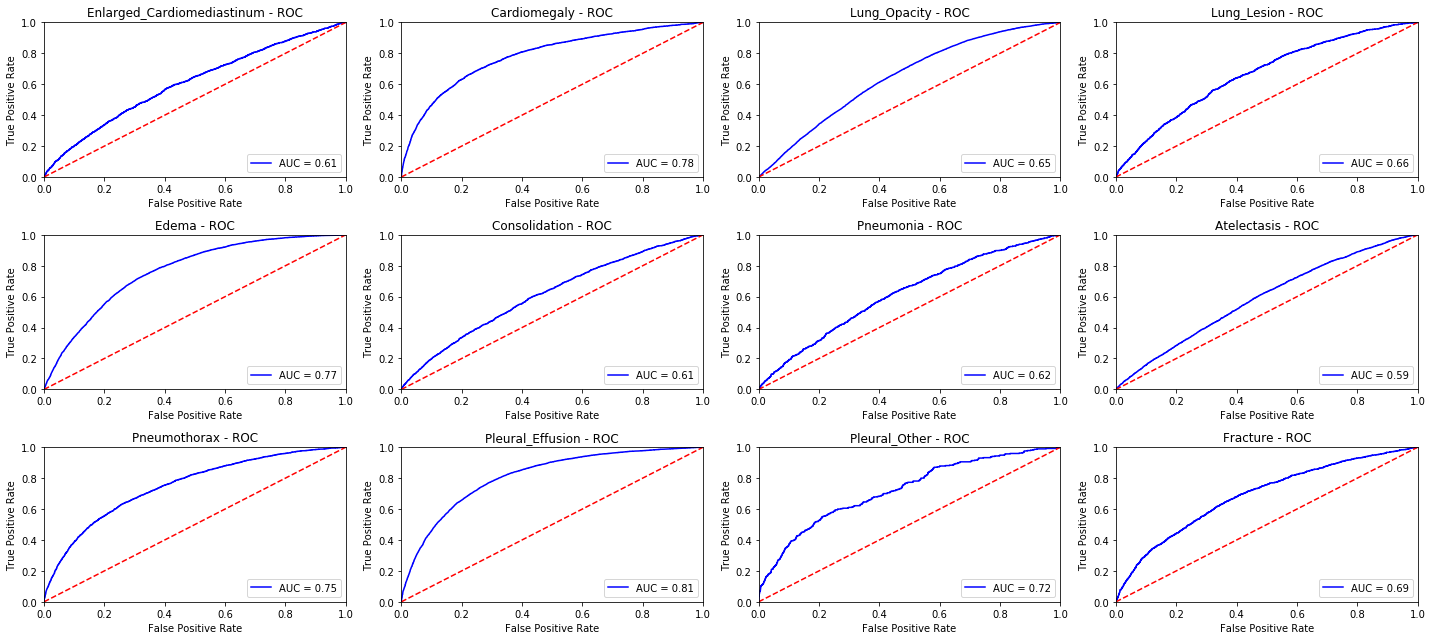

***** Precision / Recall *****


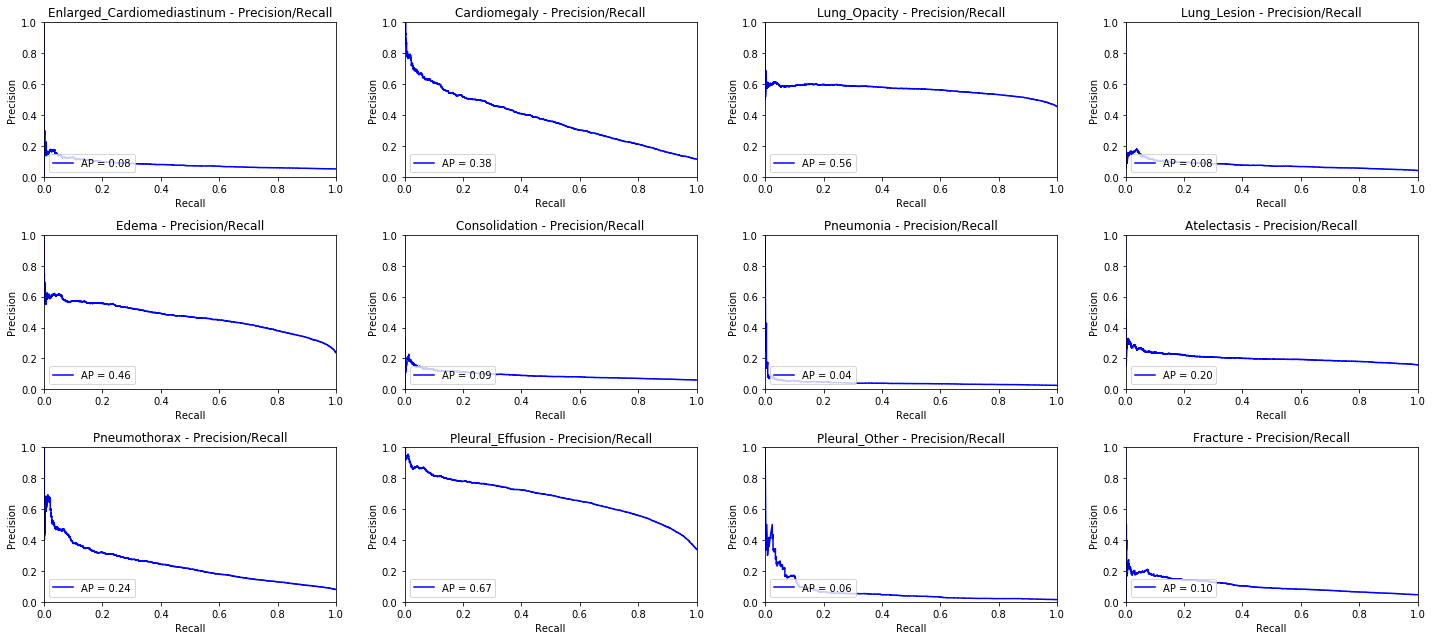

In [7]:
standardTraining.displayMetrics()